In [20]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv("Documents/HR_comma_sep.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [22]:
left = df[df.left==1]
left.shape

(3571, 10)

In [23]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [24]:
df.groupby('left').mean()
#avg no. for all columns

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

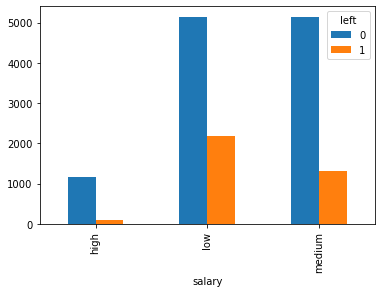

In [25]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
#shows impact of salaries in retention

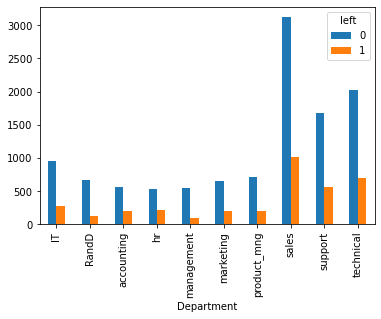

In [26]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
#shows correlation between department and employee retention

In [27]:
#From the data analysis so far we can conclude that we will use following variables as independant variables in our model
#Satisfaction Level, Average Monthly Hours, Promotion Last 5 Years, Salary
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

In [28]:
#Salary has all text data. It needs to be converted to numbers
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [29]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [30]:
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [31]:
#Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [32]:
X = df_with_dummies
X.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [33]:
y = df.left

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)


LogisticRegression()

In [37]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
model.score(X_test,y_test)

0.7784761904761904